In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn



In [2]:
from sklearn.preprocessing import StandardScaler
from pdpbox import pdp, get_dataset, info_plots
from lime import lime_tabular

In [5]:
data = pd.read_csv('winequalitynew.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,8.686373,0.533056,0.302445,2.585972,0.093978,15.025050,51.384770,0.997414,3.292485,0.697234,10.117836,5.587174
std,1.885821,0.176206,0.216786,1.383492,0.060299,9.786982,33.724734,0.001684,0.155052,0.212553,0.998464,0.790198
min,4.600000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.991200,2.740000,0.330000,8.700000,3.000000
25%,7.400000,0.400000,0.105000,1.900000,0.073000,7.000000,25.000000,0.996400,3.185000,0.560000,9.400000,5.000000
50%,8.100000,0.530000,0.270000,2.200000,0.082000,12.000000,42.000000,0.997200,3.290000,0.640000,9.800000,5.000000
75%,9.850000,0.642500,0.480000,2.700000,0.093000,20.000000,66.500000,0.998400,3.380000,0.780000,10.500000,6.000000
max,15.600000,1.330000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.000000,8.000000


In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
y = data['quality']
x =  data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

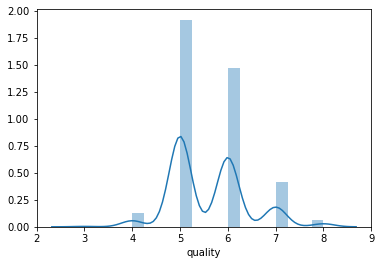

In [10]:
sn.distplot(data['quality'])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
coeff_data = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_data

,Coefficient
fixed acidity,0.083887
volatile acidity,-1.076780
citric acid,-0.476626
residual sugar,0.023216
chlorides,-1.782412
free sulfur dioxide,0.003854
total sulfur dioxide,-0.004978
density,1.911254
pH,-0.085778
sulphates,0.606584


In [13]:
y_pred = regressor.predict(x_test)


In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
21,5,5.433349
239,6,4.821407
103,5,5.098315
273,5,5.253825
22,5,5.650154
31,6,5.547165
470,5,6.154215
279,7,5.981419
281,7,5.504604
100,6,5.438494


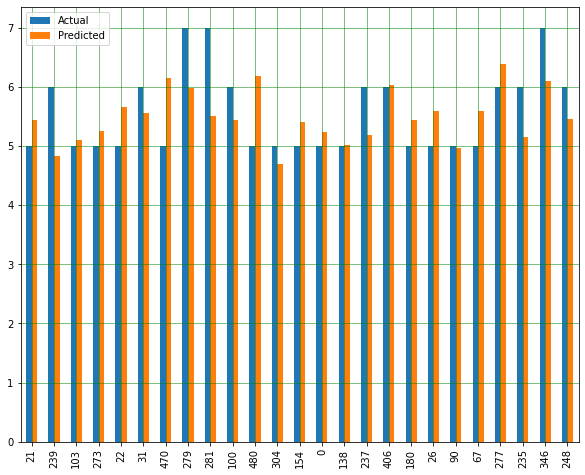

In [15]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5090689939439179
Mean Squared Error: 0.3832423600620707
Root Mean Squared Error: 0.6190657154632864


# Model-agnostic methods


# Permutation Feature Importance

In [17]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regressor).fit(x_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.3351 ± 0.1768,x10
0.0915 ± 0.1089,x6
0.0799 ± 0.0392,x2
0.0771 ± 0.0576,x9
0.0081 ± 0.0109,x5
0.0014 ± 0.0761,x1
-0.0004 ± 0.0062,x8
-0.0015 ± 0.0014,x7
-0.0072 ± 0.0085,x3
-0.0169 ± 0.0209,x0


# Partial Dependence Plots (PDPs)

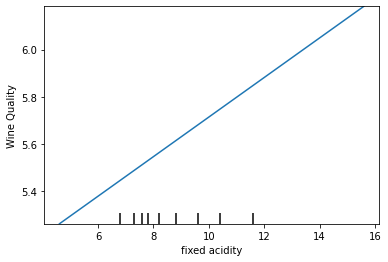

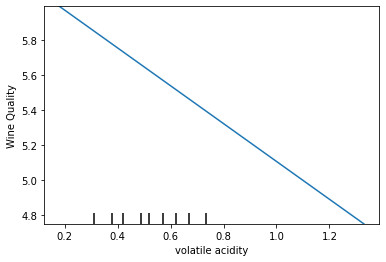

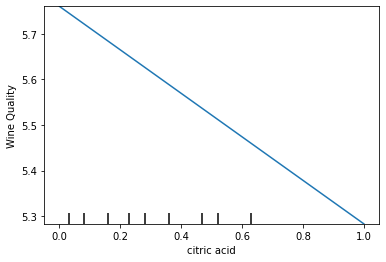

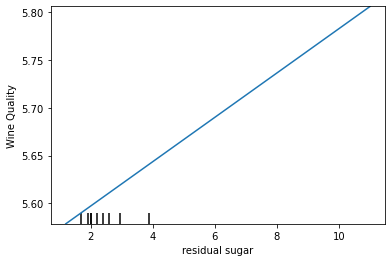

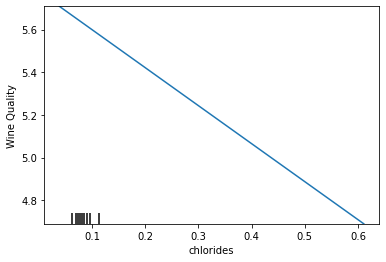

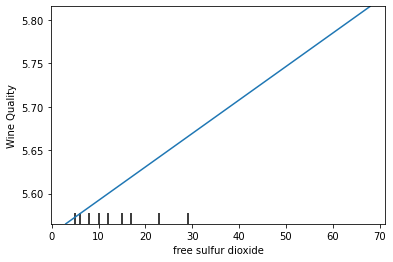

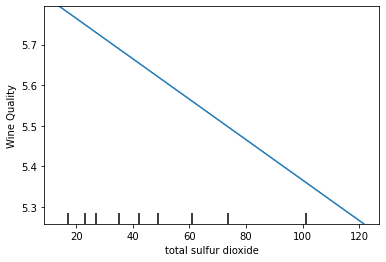

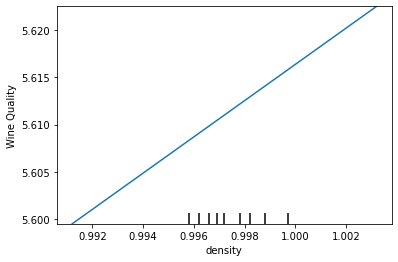

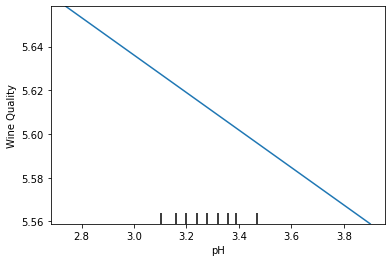

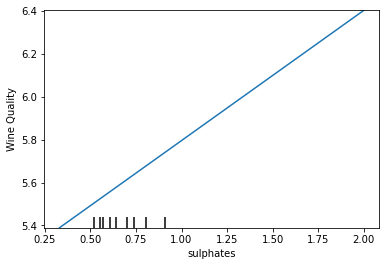

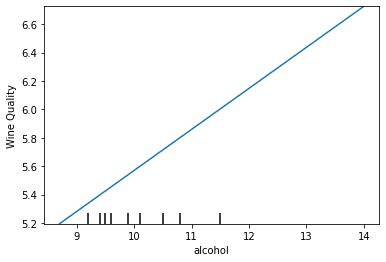

In [18]:
from sklearn.inspection import plot_partial_dependence

for i in range(len(x_train.columns)):
    plot_partial_dependence(regressor, x_train, [i])
    plt.xlabel(x.columns[i])
    plt.ylabel('Wine Quality')
    plt.show()

# LIME

In [30]:
import lime


explainer = lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns)

x_test.join(y_test)[1:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
239,8.2,1.000,0.09,2.3,0.065,7.0,37,0.99685,3.32,0.55,9.0,6
103,8.1,0.575,0.22,2.1,0.077,12.0,65,0.99670,3.29,0.51,9.2,5
273,8.4,0.715,0.20,2.4,0.076,10.0,38,0.99735,3.31,0.64,9.4,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37,0.99660,3.17,0.91,9.5,5


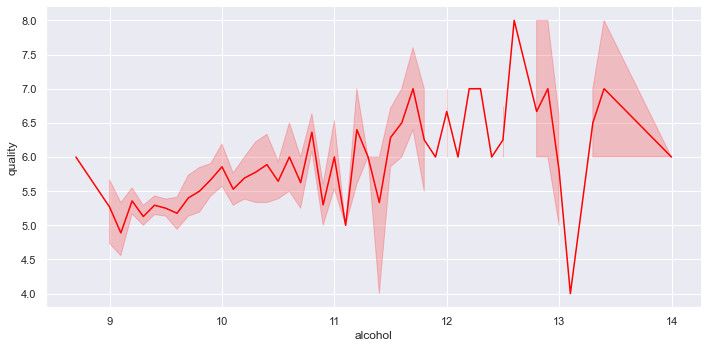

In [54]:
sn.set()
sn.relplot(data=data, x='alcohol', y='quality', kind='line', height=5, aspect=2, color='red');  

# Shapley Additive Explanations (SHAP)

In [20]:
import shap
shap.initjs()

explainer = shap.KernelExplainer(regressor.predict,x_train)
shap_values = explainer.shap_values(x_test)

Using 399 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


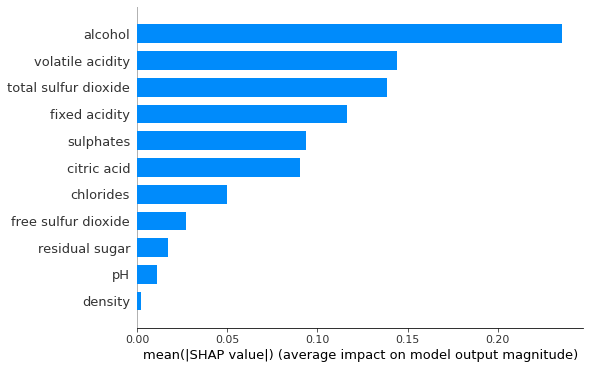

In [31]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

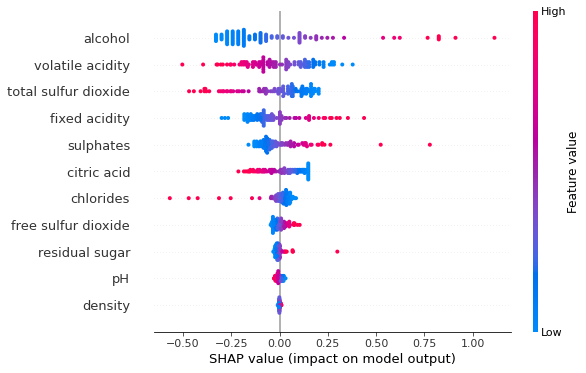

In [32]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, x_test)

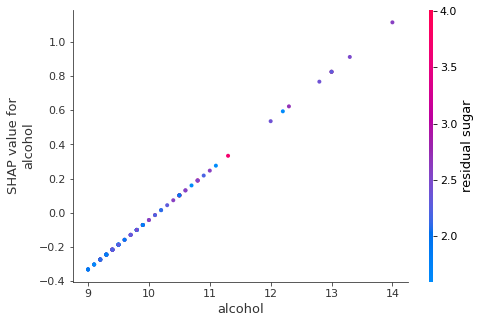

In [33]:
shap.dependence_plot("alcohol", shap_values, x_test)

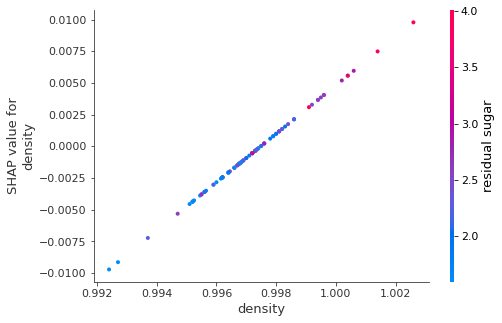

In [34]:
shap.dependence_plot("density", shap_values, x_test)